In [1]:
# this set up the  interactive visualisation mode for graphics.
%matplotlib notebook 
#%matplotlib inline

import pandas as pd
import numpy as np
pd.set_option('display.max_rows',7) #only visualise 7 rows when displaying tables
from vega import vegalite
import vega
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import feature
from skimage import measure

In [2]:
tiff_file = "samples/CET01_08_crop.tif"

im = plt.imread(tiff_file)

The image is gray scale. There are 4 chanel encoded, but they all have the same value, the alpha is encoded to 255

In [3]:
im.shape, im[0,0], im[10,0]

((604, 1024, 4),
 array([ 16,  16,  16, 255], dtype=uint8),
 array([ 17,  17,  17, 255], dtype=uint8))

we just take the fist field of the image

In [4]:
im  = im[:,:,0]

In [5]:
im.shape

(604, 1024)

<IPython.core.display.Javascript object>


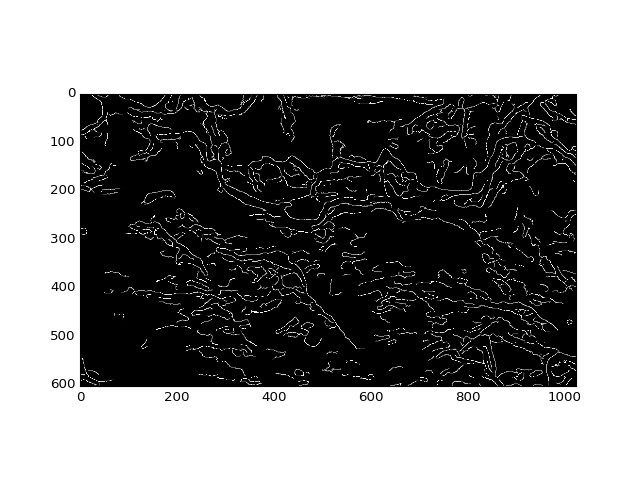

In [6]:
plt.imshow(im,cmap=plt.cm.gray)

# Step 1: edge detection

* general question
    * [this post](http://stackoverflow.com/questions/9137216/python-edge-detection-and-curvature-calculation)

* canny algorithme
    * [sckit image](http://scikit-image.org/docs/dev/auto_examples/plot_canny.html)
    * [opencv](http://www.pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/) 
* sobel
    * using ndimage.sobel
    * using [opencv](http://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Gradient_Sobel_Laplacian_Derivatives_Edge_Detection.php)

In [7]:
edges1 = feature.canny(im,sigma=0.5)

In [8]:
plt.imshow(edges1,cmap=plt.cm.gray)

In [9]:
edges2 = feature.canny(im,sigma=3)

In [10]:
plt.imshow(edges2,cmap=plt.cm.gray)

In [11]:
edges1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

<IPython.core.display.Javascript object>


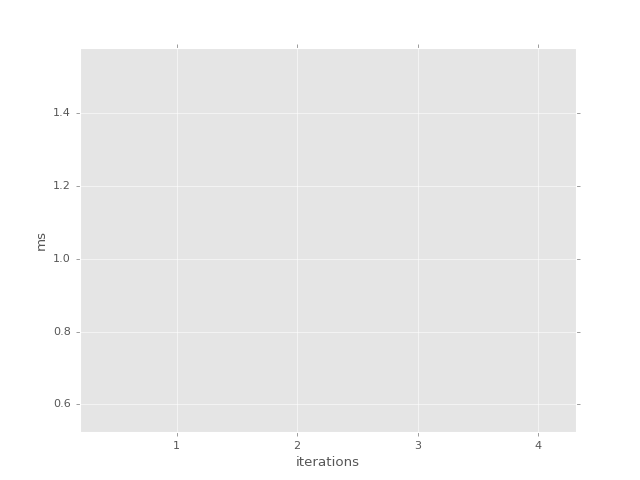

In [10]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
from IPython.html import widgets
plt.style.use('ggplot')

NUMBER_OF_PINGS = 4


# preparing the plot 
data = pd.DataFrame()
x = range(1,NUMBER_OF_PINGS+1)
plots = dict()
fig, ax = plt.subplots()
plt.xlabel('iterations')
plt.ylabel('ms')
plt.xticks(x)
plt.show()

# preparing a container to put in created checkbox per domain
checkboxes = []
cb_container = widgets.HBox()
display(cb_container)

# add button that updates the graph based on the checkboxes
button = widgets.Button(description="Update the graph")

# function to deal with the added domain name
def handle_submit(sender):
    # a part of the magic inside python : pinging
    res = !ping -c {NUMBER_OF_PINGS} {text.value}
    hits = res.grep('64 bytes').fields(-2).s.replace("time=","").split()
    if len(hits) == 0:
        print ("Domain gave error on pinging")
    else:
         # rebuild plot based on ping result
        data = hits
        data = data.astype(float)
        plots, = ax.plot(x, data, label=text.value)
        plt.legend()
        plt.draw()
        # add a new checkbox for the new domain
        checkboxes.append(widgets.Checkbox(description = text.value, value=True, width=90))
        cb_container.children=[i for i in checkboxes]
        if len(checkboxes) == 1:
            display(button)

# function to deal with the checkbox update button       
def on_button_clicked(b):
    for c in cb_container.children:
        if not c.value:
            plots.set_visible(False)
        else:
            plots.set_visible(True)
    plt.legend()
    plt.draw()

button.on_click(on_button_clicked)
text.on_submit(handle_submit)
plt.show()